<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/POSCAR_to_XRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

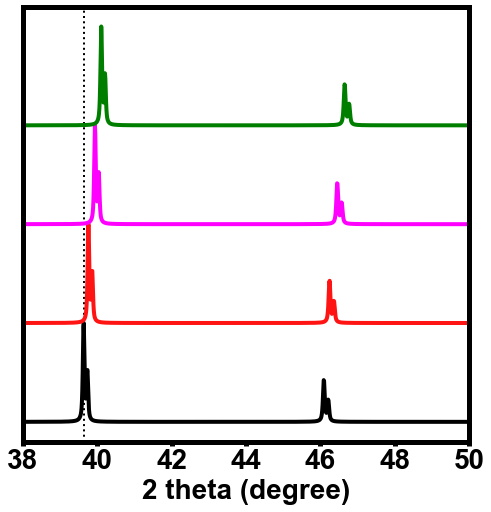

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#code first-draft written by Heejae Yang

def reading(name_file,start,end):
    f_XRD = open(name_file,'r')
    lines = f_XRD.readlines()
    XRD = list()
    for i,line in enumerate(lines):
        line = line.split()  # 줄 끝의 줄 바꿈 문자를 제거한다.
        XRD.append(line)
    f_XRD.close()
    
    XRD = XRD[2+(start-1)*100:3+(end-1)*100]
    return XRD

def XRD(name_file,start,end,color) :

  fig,ax  = plt.subplots(figsize=(8,8))
  ax.set_yticks([])
  plt.xticks(fontproperties=font_ticks)
  ax.set_xticks(np.arange(start,end+0.01,2))
  ax.set_xlabel("2 theta (degree)", fontproperties=font_labels) # x축 이름
  ax.set_xlim([start,end])
  wid=5
  ax.xaxis.set_tick_params(width=wid)
  ax.spines['bottom'] .set_linewidth(wid)# 테두리 두껍게 할려고.
  ax.spines['left'] .set_linewidth(wid)
  ax.spines['right'] .set_linewidth(wid)
  ax.spines['top'] .set_linewidth(wid)
  ax.axvline(x=39.64,linewidth=2, linestyle='dotted',c='black')
  for count, i in enumerate(name_file):
    XRD = reading(i,start,end)
    df_XRD = pd.DataFrame(XRD)
    df_XRD.columns = ['2θ','Intensity','what?']
    degree=df_XRD['2θ']
    degree= list(map(float,degree))
    intensity = df_XRD['Intensity']
    intensity= list(map(float,intensity))
    colorss=color[count]
    new_intesity = [x+40+count*100 for x in intensity] #합치려고 intensity에 조금씩 더함.
    ax.plot(degree,new_intesity,c=colorss,linewidth=wid-1) #실제로 그림그리는 라인은 이거 하나.
  plt.savefig('XRD.png',dpi=500)# 저장할지말지

font_labels = fm.FontProperties(fname='/content/font/arialbd.ttf',size=30) # 폰트 사이즈
font_ticks = fm.FontProperties(fname='/content/font/arialbd.ttf',size=30)
files = ['CONTCAR1.int','CONTCAR2.int','CONTCAR3.int','CONTCAR4.int'] # 합쳐서 그릴 파일명단
c= ['#000000','#FF1414','#FF00FF','#007E00']# 색 조절
XRD(files,38,50,c)
